In [44]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
np.random.seed(42)


def Branin_function(x1,x2):
    a = 1.0 
    b = 5.1/(4.0*(np.pi**2))
    c = 5.0/np.pi
    r = 6.0
    s = 10.0 
    t = 1/(8.0*np.pi)
    return a*(x2-b*(x1**2)+c*x1-r)**2+s*(1-t)*np.cos(x1)+s



In [40]:
n = 50


In [41]:
x1,x2 = meshgrid(np.linspace(-5, 10, n), np.linspace(0, 15, n)) # grid of point
y = Branin_function(x1, x2)

In [42]:
y.shape

(50, 50)

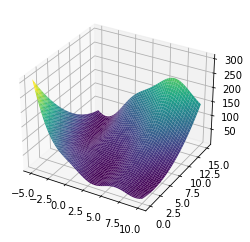

In [47]:

ax = plt.axes(projection='3d')
ax.plot_surface(x1,x2,y, rstride=1, cstride=1, cmap='viridis', edgecolor='none')



In [51]:
x1

array([[-5.        , -4.69387755, -4.3877551 , ...,  9.3877551 ,
         9.69387755, 10.        ],
       [-5.        , -4.69387755, -4.3877551 , ...,  9.3877551 ,
         9.69387755, 10.        ],
       [-5.        , -4.69387755, -4.3877551 , ...,  9.3877551 ,
         9.69387755, 10.        ],
       ...,
       [-5.        , -4.69387755, -4.3877551 , ...,  9.3877551 ,
         9.69387755, 10.        ],
       [-5.        , -4.69387755, -4.3877551 , ...,  9.3877551 ,
         9.69387755, 10.        ],
       [-5.        , -4.69387755, -4.3877551 , ...,  9.3877551 ,
         9.69387755, 10.        ]])

In [52]:
x2

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30612245,  0.30612245,  0.30612245, ...,  0.30612245,
         0.30612245,  0.30612245],
       [ 0.6122449 ,  0.6122449 ,  0.6122449 , ...,  0.6122449 ,
         0.6122449 ,  0.6122449 ],
       ...,
       [14.3877551 , 14.3877551 , 14.3877551 , ..., 14.3877551 ,
        14.3877551 , 14.3877551 ],
       [14.69387755, 14.69387755, 14.69387755, ..., 14.69387755,
        14.69387755, 14.69387755],
       [15.        , 15.        , 15.        , ..., 15.        ,
        15.        , 15.        ]])

## Sample initialization


In [56]:
n_sample = 10
sample_x = np.zeros((10,2))
sample_x[:,0] = np.random.choice(x1[0,:],n_sample)
sample_x[:,1] = np.random.choice(x2[:,0], n_sample)

In [57]:
sample_x

array([[ 3.87755102,  7.95918367],
       [ 6.32653061, 12.55102041],
       [-4.69387755,  8.26530612],
       [ 1.12244898,  4.59183673],
       [ 4.79591837,  4.28571429],
       [-1.63265306, 14.08163265],
       [ 1.42857143, 13.16326531],
       [ 8.16326531,  0.6122449 ],
       [ 2.34693878, 11.02040816],
       [ 9.69387755,  1.83673469]])

## Gaussian process

In [64]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

# Gaussian process regressor with a Matern kernel
kernel = 1.0 * Matern(length_scale=1.0, nu=1.5)
gp_model = GaussianProcessRegressor(kernel=kernel)

2

In [ ]:
# Fit the Gaussian process model to the sampled points
gp_model.fit(sample_x.reshape(-1, 1), sample_y)

# Generate predictions using the Gaussian process model
y_pred, y_std = gp_model.predict(x_range.reshape(-1, 1), return_std=True)

# Plot 
plt.figure(figsize=(10, 6))
plt.plot(x_range, black_box_function(x_range), label='Black Box Function')
plt.scatter(sample_x, sample_y, color='red', label='Samples')
plt.plot(x_range, y_pred, color='blue', label='Gaussian Process')
plt.fill_between(x_range, y_pred - 2*y_std, y_pred + 2*y_std, color='blue', alpha=0.2)
plt.xlabel('x')
plt.ylabel('Black Box Output')
plt.title('Black Box Function with Gaussian Process Surrogate Model')
plt.legend()
plt.show()

In [63]:
kernel.typeof()

AttributeError: 'RBF' object has no attribute 'typeof'